<a href="https://colab.research.google.com/github/Fardous07/PINN_solver_PDEs/blob/main/PDEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install tensorflow

Root Mean Square Error (Lax-Wendroff): 0.004159083240878546


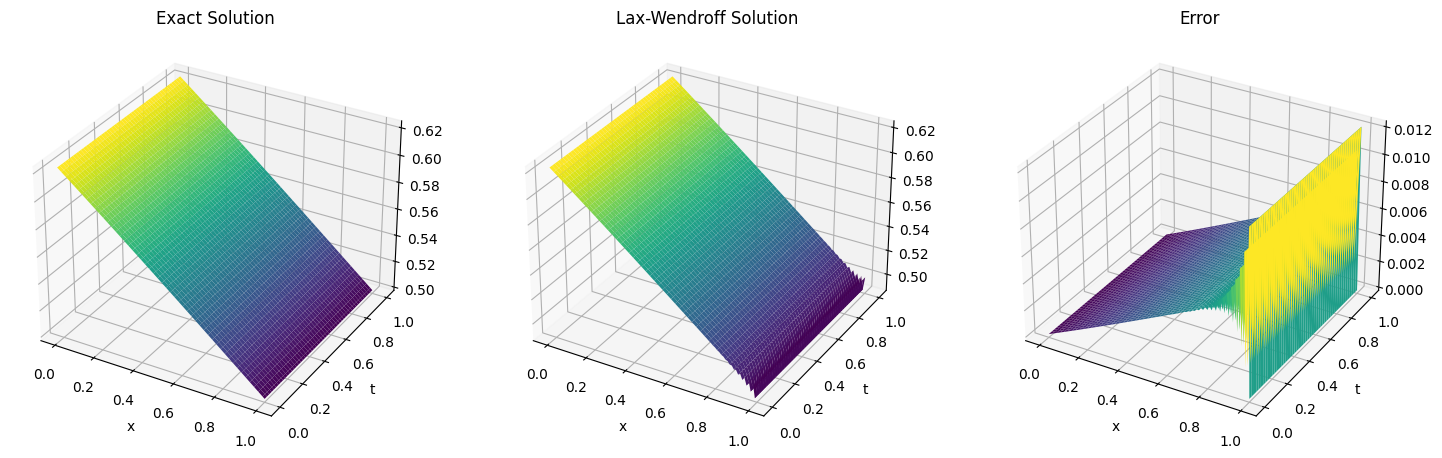

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given parameters
L = 1.0  # Spatial domain length
T = 1.0  # Temporal domain length
Nx = 100  # Number of spatial points 800
Nt = 1000  # Number of time points 8000
a = 1.0  # Parameter 'a'
c = 1.0  # Parameter 'c'

# Smaller time and space steps
dx = L / (Nx - 1)/ 18
dt = T / Nt / 19  # Adjust the divisor to make dt smaller
alpha = a
beta = (2 * a * c - a**2) / 4
nu = 0.7  # Kinematic viscosity

# Initial condition
x = np.linspace(0, L, Nx)
u = 0.5 - 0.5 * np.tanh(a * x / 4)

# Boundary conditions
u_left = 0.5 - 0.5 * np.tanh(-a * c * np.linspace(0, T, Nt) / 4)
u_right = 0.5 - 0.5 * np.tanh(a * (1 - c * np.linspace(0, T, Nt)) / 4)

# Lax-Wendroff solver function
def solve_lax_wendroff(u):
    u_new = np.copy(u)
    lambda_ = alpha * dt / dx

    for j in range(0, Nt - 1):
        u_new[1:-1] = u[1:-1] - 0.5 * lambda_ * (u[2:] - u[:-2]) + 0.5 * lambda_**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_new[0] = u_left[j + 1]
        u_new[-1] = u_right[j + 1]
        u = np.copy(u_new)

    return u

# Calculate Lax-Wendroff solution
u_lax_wendroff = solve_lax_wendroff(u)

# Exact solution
u_exact = 0.5 - 0.5 * np.tanh(a * (x - c * T) / 4)

# Calculate error
error = np.abs(np.tile(u_exact, (Nt, 1)) - np.tile(u_lax_wendroff, (Nt, 1)))

# Print RMSE for Lax-Wendroff
rmse = np.sqrt(np.mean(error**2))
print(f"Root Mean Square Error (Lax-Wendroff): {rmse}")

# Create meshgrid for 3D plots
X, T = np.meshgrid(x, np.linspace(0, T, Nt))

# Plotting
fig = plt.figure(figsize=(18, 6))

# Plot Exact Solution
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, T, np.tile(u_exact, (Nt, 1)), cmap='viridis')
ax1.set_title('Exact Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

# Plot Lax-Wendroff Solution
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, T, np.tile(u_lax_wendroff, (Nt, 1)), cmap='viridis')
ax2.set_title('Lax-Wendroff Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('t')

# Plot Error
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, T, error, cmap='viridis')
ax3.set_title('Error')
ax3.set_xlabel('x')
ax3.set_ylabel('t')

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Given parameters
L = 1.0  # Spatial domain length
T = 1.0  # Temporal domain length
Nx = 100  # Number of spatial points
Nt = 1000  # Number of time points
a = 1.0  # Parameter 'a'
c = 1.0  # Parameter 'c'

# Smaller time and space steps
dx = L / (Nx - 1) / 18
dt = T / Nt / 19  # Adjust the divisor to make dt smaller
alpha = a
beta = (2 * a * c - a**2) / 4
nu = 0.7  # Kinematic viscosity

# Initial condition
x = np.linspace(0, L, Nx)
u = 0.5 - 0.5 * np.tanh(a * x / 4)

# Boundary conditions
u_left = 0.5 - 0.5 * np.tanh(-a * c * np.linspace(0, T, Nt) / 4)
u_right = 0.5 - 0.5 * np.tanh(a * (1 - c * np.linspace(0, T, Nt)) / 4)

# Lax-Wendroff solver function
def solve_lax_wendroff(u):
    u_new = np.copy(u)
    lambda_ = alpha * dt / dx
    u_solutions = [np.copy(u)]

    for j in range(0, Nt - 1):
        u_new[1:-1] = u[1:-1] - 0.5 * lambda_ * (u[2:] - u[:-2]) + 0.5 * lambda_**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_new[0] = u_left[j + 1]
        u_new[-1] = u_right[j + 1]
        u = np.copy(u_new)
        u_solutions.append(np.copy(u))

    return u_solutions

# Calculate Lax-Wendroff solution
u_lax_wendroff = solve_lax_wendroff(u)

# Exact solution
u_exact = 0.5 - 0.5 * np.tanh(a * (x - c * T) / 4)

# Calculate error
error = np.abs(np.tile(u_exact, (Nt, 1)) - np.tile(u_lax_wendroff[-1], (Nt, 1)))

# Create a table of values
table_data = []

for i in range(Nx):
    x_value = x[i]
    error_at_x = error[:, i]

    if np.all(error_at_x < 0.04):
        approx_values = [u_solution[i] for u_solution in u_lax_wendroff]
        exact_values = [u_exact[i]] * Nt
        error_values = [error[j, i] for j in range(Nt)]

        table_data.append([x_value, *approx_values, *exact_values, *error_values])

# Define column headers
headers = ['Spatial Point'] + ['Approximate Solution'] * Nt + ['Exact Solution'] * Nt + ['Error'] * Nt

# Display the table
table = tabulate(table_data, headers, tablefmt='fancy_grid')
print(table)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Given parameters
L = 1.0  # Spatial domain length
T = 1.0  # Temporal domain length
Nx = 100  # Number of spatial points
Nt = 1000  # Number of time points
a = 1.0  # Parameter 'a'
c = 1.0  # Parameter 'c'

# Smaller time and space steps
dx = L / (Nx - 1) / 18
dt = T / Nt / 19  # Adjust the divisor to make dt smaller
alpha = a
beta = (2 * a * c - a**2) / 4
nu = 0.7  # Kinematic viscosity

# Initial condition
x = np.linspace(0, L, Nx)
u = 0.5 - 0.5 * np.tanh(a * x / 4)

# Boundary conditions
u_left = 0.5 - 0.5 * np.tanh(-a * c * np.linspace(0, T, Nt) / 4)
u_right = 0.5 - 0.5 * np.tanh(a * (1 - c * np.linspace(0, T, Nt)) / 4)

# Lax-Wendroff solver function
def solve_lax_wendroff(u):
    u_new = np.copy(u)
    lambda_ = alpha * dt / dx
    u_solutions = [np.copy(u)]

    for j in range(0, Nt - 1):
        u_new[1:-1] = u[1:-1] - 0.5 * lambda_ * (u[2:] - u[:-2]) + 0.5 * lambda_**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_new[0] = u_left[j + 1]
        u_new[-1] = u_right[j + 1]
        u = np.copy(u_new)
        u_solutions.append(np.copy(u))

    return u_solutions

# Calculate Lax-Wendroff solution
u_lax_wendroff = solve_lax_wendroff(u)

# Exact solution
u_exact = 0.5 - 0.5 * np.tanh(a * (x - c * T) / 4)

# Calculate error
error = np.abs(np.tile(u_exact, (Nt, 1)) - np.tile(u_lax_wendroff[-1], (Nt, 1)))

# Print values where error is less than 0.04
for i in range(Nx):
    x_value = x[i]
    error_at_x = error[:, i]

    if np.all(error_at_x < 0.04):
        approx_values = u_lax_wendroff[-1][i]
        exact_value = u_exact[i]
        error_values = error[-1, i]

        print(f"\nFor x = {x_value}:")
        print("Approximate Solution:", approx_values)
        print("Exact Solution:", exact_value)
        print("Error:", error_values)


For x = 0.0:
Approximate Solution: 0.6224593312018546
Exact Solution: 0.6224593312018546
Error: 0.0

For x = 0.010101010101010102:
Approximate Solution: 0.6212044327659276
Exact Solution: 0.6212717117703228
Error: 6.727900439518208e-05

For x = 0.020202020202020204:
Approximate Solution: 0.6199479088956192
Exact Solution: 0.6200826366559462
Error: 0.0001347277603269692

For x = 0.030303030303030304:
Approximate Solution: 0.6186897722352975
Exact Solution: 0.6188921183736815
Error: 0.00020234613838399085

For x = 0.04040404040404041:
Approximate Solution: 0.6174300454019288
Exact Solution: 0.6177001695057384
Error: 0.00027012410380955476

For x = 0.05050505050505051:
Approximate Solution: 0.616168744588304
Exact Solution: 0.6165068027011174
Error: 0.0003380581128133997

For x = 0.06060606060606061:
Approximate Solution: 0.6149058700502692
Exact Solution: 0.6153120306751421
Error: 0.0004061606248728644

For x = 0.07070707070707072:
Approximate Solution: 0.6136414353936287
Exact Solution

<ipython-input-5-2bf20fa11f31>:34: RuntimeWarning: overflow encountered in multiply
  return D * np.gradient(np.gradient(u, dx), dx) + beta * u * (1 - u / K)
<ipython-input-5-2bf20fa11f31>:37: RuntimeWarning: invalid value encountered in subtract
  f_half = 0.5 * (u + np.roll(u, -1)) - 0.5 * dt / dx * (g(u) - np.roll(g(u), 1))
<ipython-input-5-2bf20fa11f31>:38: RuntimeWarning: overflow encountered in multiply
  g_i = D * np.gradient(np.gradient(u, dx), dx) + beta * u * (1 - u / K)
<ipython-input-5-2bf20fa11f31>:40: RuntimeWarning: invalid value encountered in subtract
  u_new[1:-1] = u[1:-1] - dt / dx * (f_half[2:] - f_half[:-2]) + (dt**2) / (2 * dx**2) * (g_i[2:] - 2 * g_i[1:-1] + g_i[:-2])
<ipython-input-5-2bf20fa11f31>:40: RuntimeWarning: invalid value encountered in add
  u_new[1:-1] = u[1:-1] - dt / dx * (f_half[2:] - f_half[:-2]) + (dt**2) / (2 * dx**2) * (g_i[2:] - 2 * g_i[1:-1] + g_i[:-2])


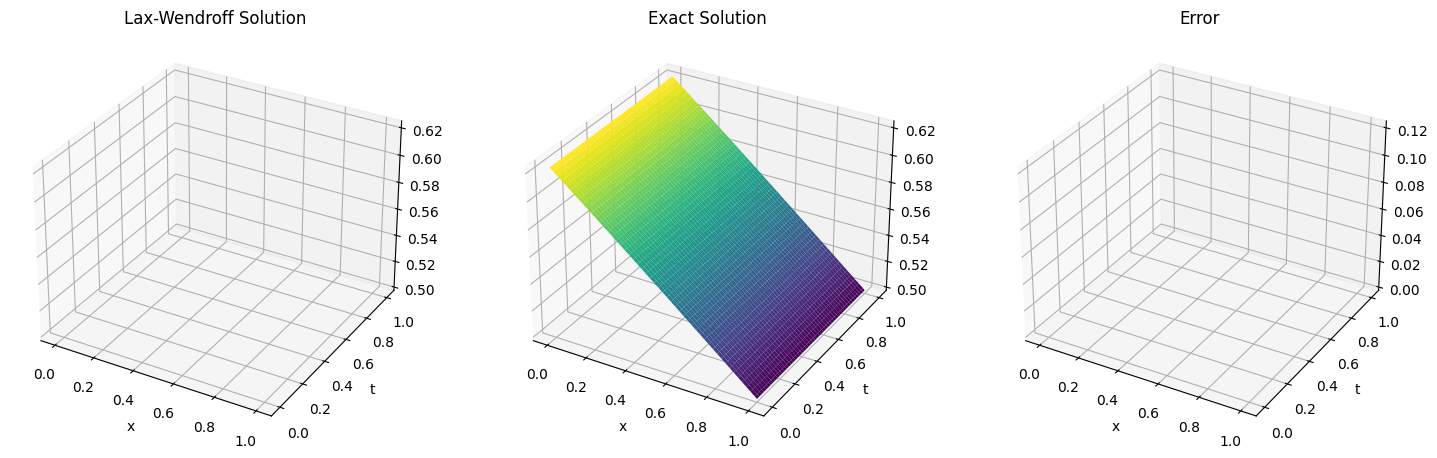

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given parameters for Burger-Fisher equation
L = 1.0      # Spatial domain length
T = 1.0      # Temporal domain length
Nx = 100     # Number of spatial points
Nt = 1000    # Number of time points
a = 1.0      # Parameter 'a'
c = 1.0      # Parameter 'c'
K = 1.0      # Parameter 'K'
D=1

# Smaller time and space steps
dx = L / (Nx - 1)/17
dt = T / Nt/19
alpha = a
beta = (2 * a * c - a**2) / 4

# Initial condition
x = np.linspace(0, L, Nx)
u_initial = 0.5 - 0.5 * np.tanh(a * x / 4)

# Boundary conditions
u_left = 0.5 - 0.5 * np.tanh(-a * c * np.linspace(0, T, Nt) / 4)
u_right = 0.5 - 0.5 * np.tanh(a * (1 - c * np.linspace(0, T, Nt)) / 4)

# Lax-Wendroff solver function for Burger-Fisher equation
def solve_lax_wendroff(u):
    u_new = np.copy(u)

    def g(u):
        return D * np.gradient(np.gradient(u, dx), dx) + beta * u * (1 - u / K)

    for j in range(0, Nt - 1):
        f_half = 0.5 * (u + np.roll(u, -1)) - 0.5 * dt / dx * (g(u) - np.roll(g(u), 1))
        g_i = D * np.gradient(np.gradient(u, dx), dx) + beta * u * (1 - u / K)

        u_new[1:-1] = u[1:-1] - dt / dx * (f_half[2:] - f_half[:-2]) + (dt**2) / (2 * dx**2) * (g_i[2:] - 2 * g_i[1:-1] + g_i[:-2])
        u_new[0] = u_left[j + 1]
        u_new[-1] = u_right[j + 1]
        u = np.copy(u_new)

    return u

# Calculate Lax-Wendroff solution
u_lax_wendroff = solve_lax_wendroff(u_initial)

# Exact solution
def exact_solution(x, t):
    return 0.5 - 0.5 * np.tanh(a / 4 * (x - c * t))

u_exact = np.zeros((Nt, Nx))
for j in range(Nt):
    u_exact[j, :] = exact_solution(x, c * np.linspace(0, T, Nt)[j])

# Create meshgrid for 3D plots
X, T = np.meshgrid(x, np.linspace(0, T, Nt))

# Plotting
fig = plt.figure(figsize=(18, 6))

# Plot Lax-Wendroff Solution
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, T, np.tile(u_lax_wendroff, (Nt, 1)), cmap='viridis')
ax1.set_title('Lax-Wendroff Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

# Plot Exact Solution at the final time step
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, T, np.tile(u_exact[-1, :], (Nt, 1)), cmap='viridis')
ax2.set_title('Exact Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('t')

# Plot Error at the final time step
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, T, np.abs(u_exact - u_lax_wendroff), cmap='viridis')
ax3.set_title('Error')
ax3.set_xlabel('x')
ax3.set_ylabel('t')

plt.show()
